# Data Analysis Script

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing Data
data = pd.read_csv("C:\\Users\\sudhanshu\\Desktop\\Springboard\\Used Cars Dataset\\eBayRevised1.csv", encoding="latin-1")

In [3]:
#Exploring Data
data.head()

,Mileage,Name,Price,Year
0,151000,2004 Acura TL Base,3700,2004
1,139134,1994 Acura Legend L Sedan 4-Door,2750,1994
2,70581,2005 Acura RL Base Sedan 4-Door,10995,2005
3,5000,1991 Acura NSX --,21900,1991
4,53180,2003 Acura NSX T,89000,2003


In [4]:
data.tail()

,Mileage,Name,Price,Year
237181,NotFound,Replica/Kit Makes,65000,NotFound
237182,11724,2015 Replica/Kit Makes SVE TR1ke,32750,NotFound
237183,10714,1957 Replica/Kit Makes Speedster,12986,1957
237184,4246,2015 Replica/Kit Makes GTM,12500,2015
237185,500,2008 Replica/Kit Makes GTM,25000,2008


Cleaning text data by removing Newline, Tabs and Carriage Return characters 

In [5]:
data["Name"] = data["Name"].map(lambda x: x.replace("\r",""))
data["Name"] = data["Name"].map(lambda x: x.replace("\n",""))
data["Name"] = data["Name"].map(lambda x: x.replace("\t",""))

Checking data types

In [6]:
data.dtypes

Mileage    object
Name       object
Price      object
Year       object
dtype: object

As "NotFound" was used as imputation value where ever scaping script was not able to find a valid value the below mentioned step removes those lines from the data set

In [7]:
CleanedData=data[data["Mileage"] != "NotFound"]
CleanedData=CleanedData[CleanedData["Name"] != "NotFound"]
CleanedData=CleanedData[CleanedData["Price"] != "NotFound"]
CleanedData=CleanedData[CleanedData["Year"] != "NotFound"]

In [8]:
CleanedData.tail()

,Mileage,Name,Price,Year
237179,219,1969 Replica/Kit Makes SSK Replica Kit Car Gaz...,17611,1969
237180,0,1979 Replica/Kit Makes,18475.95,1979
237183,10714,1957 Replica/Kit Makes Speedster,12986,1957
237184,4246,2015 Replica/Kit Makes GTM,12500,2015
237185,500,2008 Replica/Kit Makes GTM,25000,2008


Converting data columns to valid data types

In [9]:
CleanedData["Mileage"]=CleanedData["Mileage"].astype(int)
CleanedData["Year"]=CleanedData["Year"].astype(int)
CleanedData=CleanedData[CleanedData.Price.apply(lambda x: x.isnumeric())]
CleanedData["Price"]=CleanedData["Price"].astype(int)

In [10]:
CleanedData.dtypes

Mileage     int32
Name       object
Price       int32
Year        int32
dtype: object

Identifying make of the car from "Name" column

In [11]:
#Setting make of the car
CleanedData["Make"] = CleanedData["Name"].map(lambda x: x.split(" ")[1])
CleanedData["Make"] = CleanedData["Make"].map(lambda x: x.upper())

In [12]:
#Setting Model of the car

def CarModel(STRING):
    try:
        String=STRING.split(" ")[2]
        return String
    except:
        return "NoModelName"
    
CleanedData["Model"] = CleanedData["Name"].map(lambda x: CarModel(x))
CleanedData["Model"] = CleanedData["Model"].map(lambda x: x.upper())

Identifying number of years a listed car has been on road (compared with 2017)

In [13]:
#Number of years On Road
CleanedData["OnRoadYrs"] = CleanedData["Year"].map(lambda x: 2017-x)

Cleaning data as:

Removing car listings where "On Road Year" < 0, Cars listed as 2018 or beyond(probable misprint). 

Removing car listings where "Price" > 200,000, Outliers.

Removing car listings where "Mileage" > 500,000, Outliers.

In [14]:
CleanedData=CleanedData[CleanedData["OnRoadYrs"] >= 0]
CleanedData=CleanedData[CleanedData["Price"] <= 2000000]
CleanedData=CleanedData[CleanedData["Mileage"] <= 500000]

In [15]:
CleanedData.head()

,Mileage,Name,Price,Year,Make,Model,OnRoadYrs
0,151000,2004 Acura TL Base,3700,2004,ACURA,TL,13
1,139134,1994 Acura Legend L Sedan 4-Door,2750,1994,ACURA,LEGEND,23
2,70581,2005 Acura RL Base Sedan 4-Door,10995,2005,ACURA,RL,12
3,5000,1991 Acura NSX --,21900,1991,ACURA,NSX,26
4,53180,2003 Acura NSX T,89000,2003,ACURA,NSX,14


In [16]:
CleanedData.describe()

,Mileage,Price,Year,OnRoadYrs
count,233827.000000,2.338270e+05,233827.000000,233827.000000
mean,46217.483242,3.876203e+04,2000.962057,16.037943
std,43784.238281,6.442216e+04,21.970772,21.929721
min,0.000000,1.000000e+00,1878.000000,0.000000
25%,14450.000000,1.299000e+04,2000.000000,2.000000
50%,36007.000000,2.359500e+04,2012.000000,5.000000
75%,63221.000000,3.899900e+04,2015.000000,17.000000
max,500000.000000,1.999995e+06,2017.000000,139.000000


Average car in the data set is priced at $38,762 and has run 46,217 miles

In [17]:
#Number of cars in the dataset
len(CleanedData)

233827

C:\Users\sudhanshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


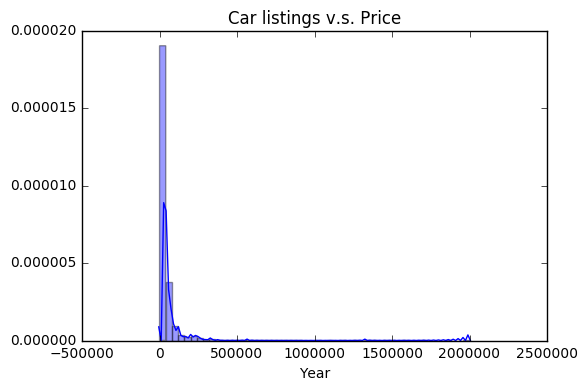

In [18]:
ax = sns.distplot(CleanedData["Price"])
ax.set(xlabel='Year')
ax.set_title("Car listings v.s. Price")
plt.show()

Breakup of car listings by year

C:\Users\sudhanshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


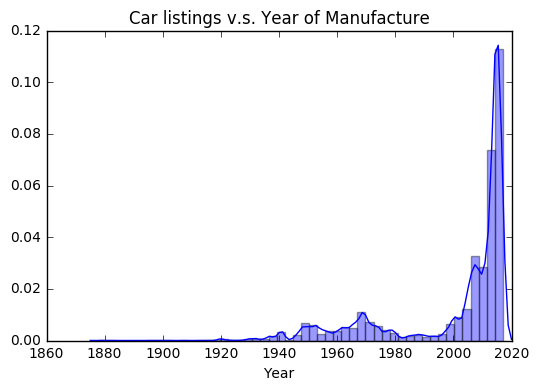

In [19]:
ax = sns.distplot(CleanedData["Year"])
ax.set(xlabel='Year')
ax.set_title("Car listings v.s. Year of Manufacture")
plt.show()

Binning Price, Mileage and Year on road.


Cutoff determined by plotting histogram on tableau

https://public.tableau.com/profile/sudhanshu.chib8525#!/vizhome/UsedCars_2/Dashboard1?publish=yes

In [20]:
#Binning or Categorising Variables:

def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning On Road Yrs
cut_points = [2,5,10,15,20,50]
labels = ["LessThan2","2To5","5To10","10To15","15To20","20To50","Heritage"]
CleanedData["CatYear"] = binning(CleanedData["OnRoadYrs"], cut_points, labels)

#Binning Mileage
cut_points = [5000,10000,20000,30000,50000,75000,100000,150000,300000]
labels = ["LessThan5K","5To10K","10To20K","20To30K","30To50K","50To75K","75To100K","100To150K","150To300K","RunDown"]
CleanedData["CatMileage"] = binning(CleanedData["Mileage"], cut_points, labels)

#Binning cars as Contemporary and Collectable
cut_points = [15]
labels = ["Contemporary","Collectable"]
CleanedData["CarType"] = binning(CleanedData["OnRoadYrs"], cut_points, labels)


In [21]:
#Removing unwanted Brands
CarBrands=["ACURA","ALFA","AMC","ASTON","AUDI","AUSTIN","BENTLEY","BMW","BUICK","CADILLAC","CHEVROLET","CHRYSLER","DAIHATSU","DATSUN",
           "DELOREAN","DESOTO","DODGE","EAGLE","FERRARI","FIAT","FISKER","FORD","GENESIS","GEO","GMC","HONDA","HUDSON","HUMMER","HYUNDAI",
           "INFINITI","INTERNATIONAL","ISUZU","JAGUAR","JEEP","KIA","LAMBORGHINI","LAND","LEXUS","LINCOLN","LOTUS","MASERATI","MAYBACH",
           "MAZDA","MCLAREN","MERCEDES-BENZ","MERCURY","MG","MINI","MITSUBISHI","NASH","NISSAN","OLDSMOBILE","PACKARD","PLYMOUTH",
           "PONTIAC","PORSCHE","RAM","RENAULT","ROLLS-ROYCE","SAAB","SATURN","SCION","SHELBY","SMART","STUDEBAKER","SUBARU","SUNBEAM",
           "SUZUKI","TESLA","TOYOTA","TRIUMPH","VOLVO","VOLKSWAGEN"]


In [22]:
CleanedData=CleanedData[CleanedData["Make"].isin(CarBrands)]


In [23]:
len(CleanedData)

223517

In [24]:
BrandMedPrice=CleanedData.groupby(["Make"], as_index=False)["Price"].median().sort_values(by="Price", ascending=False)
BrandMedPrice.columns = ["Brand", "MedianPrice"]


In [25]:
CleanedData.dtypes

Mileage          int32
Name            object
Price            int32
Year             int32
Make            object
Model           object
OnRoadYrs        int64
CatYear       category
CatMileage    category
CarType       category
dtype: object

In [26]:
CleanedData.to_csv('C:\\Users\\sudhanshu\\Desktop\\Springboard\\Used Cars Dataset\\CleanedDataRevised.csv', index=True, header=True)

Attempt to find benchmark values for depreciation with mileage and number of years on road.

Approach: Regress price on mileage and price on number of years on road for all the the population and then individually for each car brand.

When Price is regressed on mileage and # of years on road for the population the cofficient of regression cofficient will give us benchmarks for depreciation (ideally we should get negative cofficients).

Indvidual regression will give brand specific numbers which can then be compared with population benchmarks on a 2x2 grid to identify brands that outperform benchmarks (depreciate less than the average population)


In [27]:
from sklearn.linear_model import LinearRegression
import numpy as np

Calculating impact of years on road and mileage on car's price by individually regressing them agaist price of the car

1. Running the algo for Contemporary cars (<15 yrs on road)

In [28]:
CleanedData=CleanedData[CleanedData["Price"] >= 1000]
CleanedData=CleanedData[CleanedData["Mileage"] >= 100]
Contemporary=CleanedData[CleanedData["CarType"] == "Contemporary"]

In [29]:
test=Contemporary.groupby(["Make"], as_index=False)["CarType"].count().sort_values(by="CarType",ascending=False)

In [30]:
test.head()

,Make,CarType
19,INFINITI,9869
18,HYUNDAI,9717
51,TESLA,9714
38,NISSAN,9518
0,ACURA,9027


In [31]:
test=test[test["CarType"] >= 100]
MakeList = test["Make"].tolist()

In [32]:
Contemporary["OnRoadYrs"].replace(
    to_replace=0,
    value=0.5,
    inplace=True
)

Contemporary=Contemporary.loc[Contemporary["Make"].isin(MakeList)]
Contemporary["LogPrice"] = np.log(Contemporary["Price"])
Contemporary["LogOnRoadYrs"] = np.log(Contemporary["OnRoadYrs"])
Contemporary["LogMileage"] = np.log(Contemporary["Mileage"])

C:\Users\sudhanshu\Anaconda3\lib\site-packages\pandas\core\generic.py:3443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [33]:
Contemporary.describe()

,Mileage,Price,Year,OnRoadYrs,LogPrice,LogOnRoadYrs,LogMileage
count,167647.000000,1.676470e+05,167647.000000,167647.000000,167647.000000,167647.000000,167647.000000
mean,49431.522049,3.982808e+04,2012.707236,4.329899,10.126644,1.077426,10.399977
std,42584.414062,5.159479e+04,3.830149,3.674390,0.918784,0.927207,1.042867
min,100.000000,1.000000e+03,2002.000000,0.500000,6.907755,-0.693147,4.605170
25%,21036.000000,1.399500e+04,2011.000000,2.000000,9.546455,0.693147,9.953991
50%,38357.000000,2.428000e+04,2014.000000,3.000000,10.097408,1.098612,10.554692
75%,63823.000000,4.148500e+04,2015.000000,6.000000,10.633087,1.791759,11.063869
max,486003.000000,1.995900e+06,2017.000000,15.000000,14.506606,2.708050,13.093970


C:\Users\sudhanshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


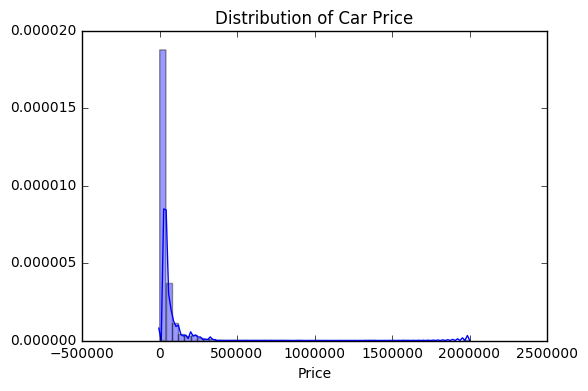

In [34]:
ax = sns.distplot(Contemporary["Price"])
ax.set(xlabel='Price')
ax.set_title("Distribution of Car Price")
plt.show()

C:\Users\sudhanshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


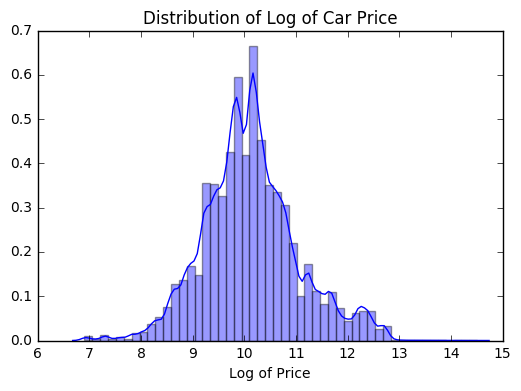

In [35]:
ax = sns.distplot(Contemporary["LogPrice"])
ax.set(xlabel='Log of Price')
ax.set_title("Distribution of Log of Car Price")
plt.show()

C:\Users\sudhanshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


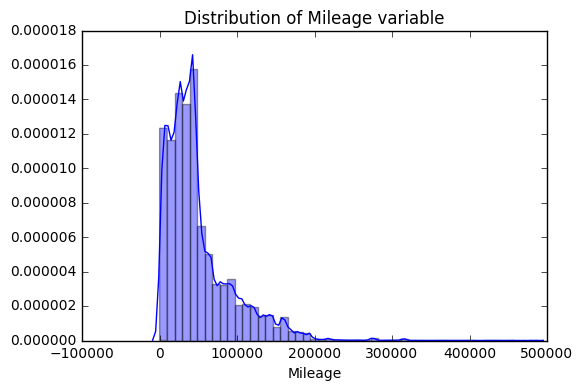

In [36]:
ax = sns.distplot(Contemporary["Mileage"])
ax.set(xlabel='Mileage')
ax.set_title("Distribution of Mileage variable")
plt.show()

C:\Users\sudhanshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


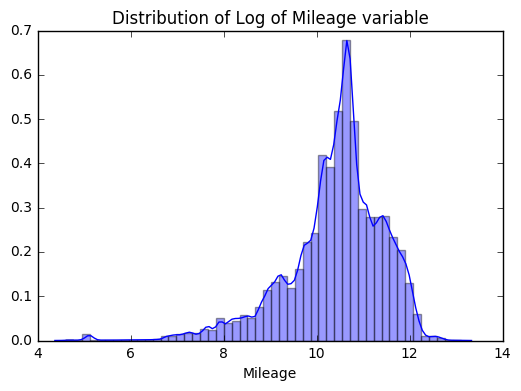

In [37]:
ax = sns.distplot(Contemporary["LogMileage"])
ax.set(xlabel='Mileage')
ax.set_title("Distribution of Log of Mileage variable")
plt.show()

In [38]:
#Regression for Price Vs Mileage
lmMileage=LinearRegression()
#Contemporary=CleanedData[CleanedData["CarType"] == "Contemporary"]
lmMileage.fit(Contemporary.iloc[:, 10].to_frame(), Contemporary.iloc[:, 12].to_frame())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
MileageCoff=str(lmMileage.coef_).replace("[","").replace("]","").replace(" ","")
MileageCoff

'-0.57509752'

In [40]:
#Regression for Price Vs Number of Years on Road
lmYears=LinearRegression()
lmYears.fit(Contemporary.iloc[:, 0].to_frame(), Contemporary.iloc[:, 6].to_frame())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
YrsOnRoadCoff=str(lmYears.coef_).replace("[","").replace("]","").replace(" ","")
YrsOnRoadCoff

'4.45895965e-05'

In [42]:
MileageCoffList=[]
VintageCoffList=[]
BrandsList=[]

for CarBrands in MakeList:
    print(CarBrands)
    BrandsList.append(CarBrands)
    
    #Regression for Price Vs Mileage
    lmMileage=LinearRegression()
    CarBrandSubSet=Contemporary[Contemporary["Make"] == CarBrands]
    lmMileage.fit(CarBrandSubSet.iloc[:, 10].to_frame(), CarBrandSubSet.iloc[:, 12].to_frame())
    MileageCoff=str(lmMileage.coef_).replace("[","").replace("]","").replace(" ","")
    print("Mileage Coff:",MileageCoff)
    MileageCoffList.append(MileageCoff)
    
    #Regression for Price Vs Number of Years on Road
    lmYears=LinearRegression()
    lmYears.fit(CarBrandSubSet.iloc[:, 0].to_frame(), CarBrandSubSet.iloc[:, 6].to_frame())
    YrsOnRoadCoff=str(lmYears.coef_).replace("[","").replace("]","").replace(" ","")
    print("Vintage Coff:",YrsOnRoadCoff)
    VintageCoffList.append(YrsOnRoadCoff)

INFINITI
Mileage Coff: -0.86413838
Vintage Coff: 8.03258346e-05
HYUNDAI
Mileage Coff: -0.74618105
Vintage Coff: 3.45614104e-05
TESLA
Mileage Coff: -0.01745687
Vintage Coff: 3.86066558e-05
NISSAN
Mileage Coff: -0.29937058
Vintage Coff: 6.11298775e-05
ACURA
Mileage Coff: -0.85199101
Vintage Coff: 6.60561102e-05
MERCEDES-BENZ
Mileage Coff: -0.40475189
Vintage Coff: 7.43854783e-05
LINCOLN
Mileage Coff: -0.52364779
Vintage Coff: 3.72168690e-05
HUMMER
Mileage Coff: -0.58454204
Vintage Coff: 1.56236863e-05
RAM
Mileage Coff: -0.11041793
Vintage Coff: 1.44885205e-05
ASTON
Mileage Coff: -1.76644541
Vintage Coff: 0.00014124
BENTLEY
Mileage Coff: -1.21249831
Vintage Coff: 0.00013873
KIA
Mileage Coff: -0.83500673
Vintage Coff: 4.60839021e-05
FORD
Mileage Coff: -0.32207857
Vintage Coff: 4.71383958e-05
LOTUS
Mileage Coff: 0.0039032
Vintage Coff: 8.12752980e-05
AUDI
Mileage Coff: -0.63305801
Vintage Coff: 6.83155701e-05
CHEVROLET
Mileage Coff: -0.32293752
Vintage Coff: 4.57865306e-05
DODGE
Mileage Cof

In [43]:
Cofficients = pd.DataFrame(
    {"CarBrand": BrandsList,
     "MileageCoff": MileageCoffList,
     "VintageCoff": VintageCoffList
    })

In [44]:
Cofficients.to_csv('C:\\Users\\sudhanshu\\Desktop\\Springboard\\Used Cars Dataset\\Cofficients.csv', index=False, header=True)

Calculating brand level depreciation

Sor the same sub set of brands calculating average depreciation over  15 yrs

In [45]:
BrandDep=CleanedData[CleanedData["CarType"] == "Contemporary"]
BrandDep=BrandDep.loc[BrandDep["Make"].isin(MakeList)]
BrandDepreciationDF=pd.pivot_table(BrandDep, values="Price", index="Make",columns="CatYear", aggfunc=np.mean)
BrandDepreciationDF=BrandDepreciationDF.iloc[:,0:4]
BrandDepreciationDF = BrandDepreciationDF.dropna()
BrandDepreciationDF.head()

CatYear,LessThan2,2To5,5To10,10To15
Make,,,,
ACURA,26823.953286,15679.990654,10643.018012,8527.382114
ASTON,175418.086932,117639.442915,60158.495984,61890.185612
AUDI,23708.266561,27668.861111,27962.455128,17614.250000
BENTLEY,206620.887974,125152.506422,93113.406533,48492.162122
BMW,39595.454128,28560.879781,18757.766917,21846.068027


In [46]:
BrandDepreciationDF["Dep1"]=(1 - BrandDepreciationDF["2To5"]/BrandDepreciationDF["LessThan2"])*100
BrandDepreciationDF["Dep2"]=(1 - BrandDepreciationDF["5To10"]/BrandDepreciationDF["2To5"])*100
BrandDepreciationDF["Dep3"]=(1 - BrandDepreciationDF["10To15"]/BrandDepreciationDF["5To10"])*100
BrandDepreciationDF["AvgDep"]=(BrandDepreciationDF["Dep1"]+BrandDepreciationDF["Dep2"]+BrandDepreciationDF["Dep3"])/3
BrandDepreciationDF["Index"]=(50-BrandDepreciationDF["AvgDep"])

In [47]:
BrandDepreciationDF.to_csv('C:\\Users\\sudhanshu\\Desktop\\Springboard\\Used Cars Dataset\\Depreciation.csv', index=True, header=True)

Bucketing car brands by average starting price of cars (less than or equal to 1 year on road)

In [48]:
#Contemporary.groupby(["Make"], as_index=False)["CarType"].count().sort_values(by="CarType",ascending=False)
BrandCategory=BrandDep[BrandDep["OnRoadYrs"] <= 1]
#BrandCategory.head()
BrandCategory=BrandCategory.groupby(["Make"], as_index=False)["Price"].mean().sort_values(by="Price",ascending=False)

C:\Users\sudhanshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


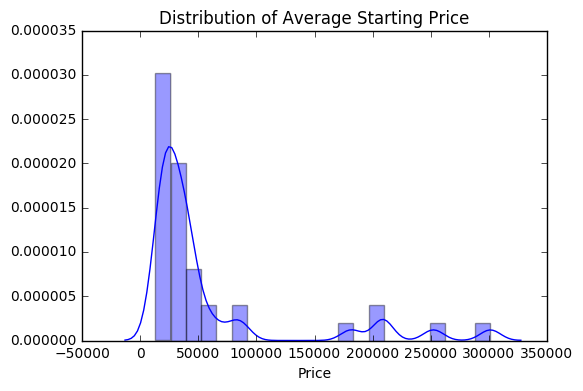

In [49]:
ax = sns.distplot(BrandCategory["Price"])
ax.set(xlabel='Price')
ax.set_title("Distribution of Average Starting Price")
plt.show()

In [50]:
Validation=BrandDep[BrandDep["OnRoadYrs"] <= 1]
Validation["LogPrice"]=np.log(Validation["Price"])

C:\Users\sudhanshu\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\Users\sudhanshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


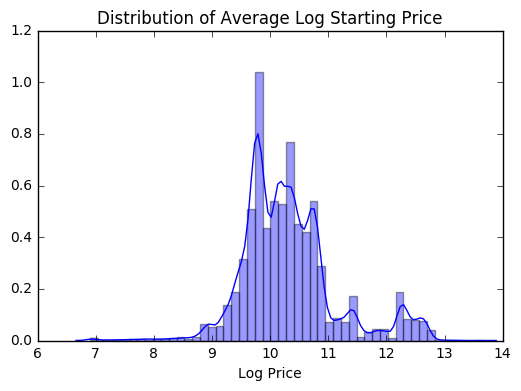

In [51]:
ax = sns.distplot(Validation["LogPrice"])
ax.set(xlabel='Log Price')
ax.set_title("Distribution of Average Log Starting Price")
plt.show()

In [52]:
Check=Validation.groupby(["Make"], as_index=False)["LogPrice","Price"].mean().sort_values(by="LogPrice",ascending=False)
#Check.head(len(Check))

In [53]:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning On Road Yrs
cut_points = [Check.LogPrice.quantile(0.25),Check.LogPrice.quantile(0.50),Check.LogPrice.quantile(0.75)]
labels = ["Bottom25","25To50","50To75","Top25"]
Check["Category"] = binning(Check["LogPrice"], cut_points, labels)


In [54]:
Check.to_csv('C:\\Users\\sudhanshu\\Desktop\\Springboard\\Used Cars Dataset\\Category.csv', index=False, header=True)
#Check.head(len(Check))

Link to car brand comparison dashboard:
https://public.tableau.com/profile/sudhanshu.chib8525#!/vizhome/CarBrandsCrosstab_Revised/Crosstab1?publish=yes